label: [5 0 4 1 9 2 1 3 1 4]


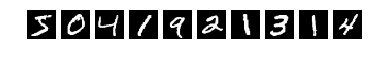

In [5]:
%matplotlib inline
import numpy as np
import os
import urllib
import gzip
import struct
import mxnet as mx
import matplotlib.pyplot as plt
from sklearn import datasets
import logging


def download_data(url, force_download=False):
    fname = url.split("/")[-1]
    if force_download or not os.path.exists(fname):
        urllib.request.urlretrieve(url, fname)
    return fname


def read_data(label_url, image_url):
    with gzip.open(download_data(label_url)) as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        label = np.fromstring(flbl.read(), dtype=np.int8)
    with gzip.open(download_data(image_url), 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        image = np.fromstring(fimg.read(), dtype=np.uint8).reshape(
            len(label), rows, cols)
    return (label, image)


path = 'http://yann.lecun.com/exdb/mnist/'
(train_lbl, train_img) = read_data(
    path + 'train-labels-idx1-ubyte.gz', path + 'train-images-idx3-ubyte.gz')
(val_lbl, val_img) = read_data(
    path + 't10k-labels-idx1-ubyte.gz', path + 't10k-images-idx3-ubyte.gz')

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(train_img[i], cmap='Greys_r')
    plt.axis('off')
# plt.show()
print('label: %s' % (train_lbl[0:10],))


def to4d(img):
    return img.reshape(img.shape[0], 1, 28, 28).astype(np.float32) / 255


In [7]:
tmp = to4d(train_img)

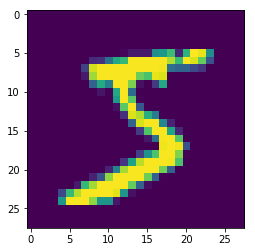

In [6]:
plt.imshow(train_img[0])

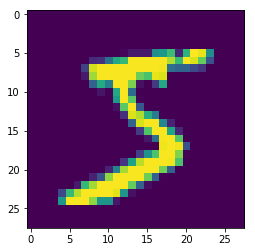

In [10]:
plt.imshow(tmp[0][0])